# Linear Regression with One Variable

## Find the relationship between life satisfaction and GDP per capita

Variable X - GDP per capita

Gross domestic product (GDP) is a monetary measure of the market value of all final goods and services produced in a period of time. GDP per capita measures the value produced per person.

Variable Y - Life satisfaction

Life satisfaction measures how people evaluate their life as a whole, on a scale from 0 to 10.



In [7]:
# set up current directory
import os
datapath = os.getcwd()
datapath = os.path.join(datapath, '')
# datapath = os.path.join(datapath, '')
os.chdir(datapath)
os.getcwd()

'C:\\Users\\Amanda\\Downloads\\CMP 464'

In [36]:
# load data files
import pandas as pd
oecd_bli = pd.read_csv(datapath + 'BLI.csv', thousands=',', delimiter='\t')
gdp_per_capita = pd.read_csv(datapath + "GDP per capita.aspx",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1', 
                             na_values="n/a")
# parameters of pandas.read_csv():
# thousands: thousand separator
# delimiter: separator of data values
# na_values: additional strings to recognized as NaN (Not a 
# Number)

In [37]:
oecd_bli.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [38]:
# Prepare the data

# oecd_bli
# 1. extract rows whose INEQUALITY is TOT
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']

# 2. use DataFrame.pivot() to produce a pivot table of values based on the Indicator column
#option 1:
#oced_bli = oced_bli[oecd_bli['Indicator'] == 'Life satisfaction'] #extracts values without creating a pivot table 

#option 2:
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value') 

# gdp_per_capita
# 1. use DataFrame.rename to rename gdp_per_capita's column 2015 with 'GDP per capita'
gdp_per_capita.rename(columns={'2015':'GDP per capita'}, inplace=True)

# 2: use DataFrame.set_index to set column 'Country' as index
gdp_per_capita.set_index('Country', inplace=True)

# merge two data frames as full_country_stats
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
                              left_index=True, right_index=True)

# sort the new data frame by GDP per capita
full_country_stats.sort_values(by='GDP per capita', inplace=True)

# Remove some random countries: row 0, 1, 6, 8, 33 - 35 and name the data frame 
# as country_stats. Removed coutries will be used to test the model.
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Mexico,9009.280,6.6
Russia,9054.914,6.0
Turkey,9437.372,5.5
Hungary,12239.894,5.3
Chile,13340.905,6.7


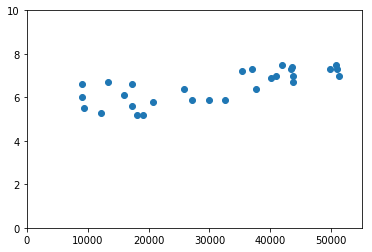

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualize the data
# plot a scatter plot with x axis being 'GDP per capita' and y-axis 'Life satisfaction'
axes = plt.axes()
axes.set_ylim([0,10]) #include entire Life satisfaction range
axes.set_xlim([0,55000])

plt.scatter(country_stats['GDP per capita'], country_stats['Life satisfaction'])

# xkcd style :)
# plt.xkcd()
# plt.rcdefaults()

In [26]:
import numpy as np
import sklearn.linear_model
# save GDP per capita as a numpy array X
X = np.c_[country_stats['GDP per capita']]

# save Life satisfaction as a numpy array Y
Y = np.c_[country_stats['Life satisfaction']]
#print('X:', X)
#print('Y:', Y)

# np.c_: convert a list of objects to a numpy array

# Use linear regression to fit the data
lm = sklearn.linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Make a prediction for Cyprus
# Display Cyprus' GDP per capita
gdp_Cyprus = gdp_per_capita['GDP per capita'][gdp_per_capita.index == "Cyprus"]
print('Cyprus GDP per capita:', gdp_Cyprus)
# use LinearRegression.predict() to predict the life satisfaction
# of Cyprus
lm.predict([gdp_Cyprus])
X_new = gdp_Cyprus
Y_new = lm.predict([gdp_Cyprus])

Cyprus GDP per capita: Country
Cyprus    22587.49
Name: GDP per capita, dtype: float64


In [29]:
# Test the accuracy of the model with values removed earlier.
test_country_stats = pd.DataFrame(full_country_stats.iloc[remove_indices])
# make predictions
predictions = lm.predict(np.c_[test_country_stats['GDP per capita']])
test_country_stats['Prediction'] = predictions

test_country_stats[['GDP per capita', 'Life satisfaction', 'Prediction']].head(10)

,GDP per capita,Life satisfaction,Prediction
Country,,,
South Africa,5694.572,4.8,5.519633
Brazil,8669.998,6.6,5.636731
Poland,12495.334,6.0,5.787278
Latvia,13618.569,5.9,5.831484
Denmark,52114.165,7.5,7.346488
United States,55805.204,6.9,7.491749
Norway,74822.106,7.5,8.240164


intercept: [ 5.29552141]
slope: [[  3.93552546e-05]]
x_coordinates: [    0 55000]
y_coordinates: [ 5.29552141  7.46006041]


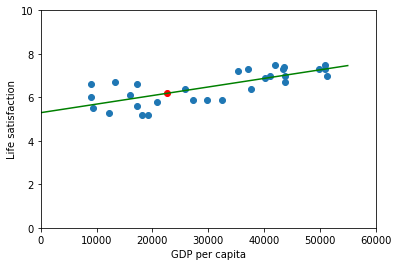

In [30]:
# coefficients of the regression line
intercept, slope = lm.intercept_, lm.coef_
print('intercept:', intercept)
print('slope:', slope)

# recreate the scatter plot of training data
axes = plt.axes()
axes.set_ylim([0, 10])
axes.set_xlim([0, 60000])
plt.scatter(country_stats['GDP per capita'],
            country_stats['Life satisfaction'])
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')

# add predictions of Cyprus
plt.scatter(X_new, Y_new, color='red')

# add regression line
x_coordinates = np.array([0, 55000])
y_coordinates = intercept + x_coordinates * slope[0] 
print('x_coordinates:', x_coordinates)
print('y_coordinates:', y_coordinates)

plt.plot(x_coordinates, y_coordinates, '-', color='green')

plt.show()

## Linear regression: model representation

In order to figure out how to find the line that best fits the data, we need to specify some notations:

n = number of training examples

$x^{(1)}, ..., x^{(n)}$: "input" variable - GDP per capita

$y^{(1)}, ..., y^{(n)}$: "output" variable - Life satisfaction

Pair $(x^{(i)}, y^{(i)})$ corresponds to the $i$-th country.


## Hypothesis of linear regression model:
Hypothesis: the relationship between x and y can be described as a straight line.

Mathematical expression:

$y = m\cdot x + b$

### How to choose $m$ and $b$?
On average, for a training example $(x,y)$, the value $mx+b$ should be close to the true value $y$.

How to measure closeness of two values? The measurement:

1. should be small when two values are close, large when two values are far apart.
2. easy to compute, easy to minimize (require derivatives)

One good choice: square of difference

Mathematical expression:

$\min_{m, b}\frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$

The expression to be minimized is called the cost function of the model.

## Example:

x's: {1, 2, 3, 4, 5}

y's: {1, 2, 1.3, 3.75, 2,25}

Q: for $m=0.4$, $b=0.8$, what is the value for the cost function?

Q: How to minimize the cost function?

Method 1: find closed form solution.

Method 2: use gradient descent

Method 3: use stochastic gradient descent


In [1]:
#Q1 = 0.563

# Q2: Method 1

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xs = np.array([1,2,3,4,5]) # input
ys = np.array([1,2,1.3,3.75,2.25]) # output

xs = np.arange(1, 6, 1)
n = len(xs)
print('xs:', xs)
print('ys:', ys)
print('n:', n)

A = (np.sum(xs**2))/n
B = (np.sum(2*xs))/n
C = 1
D = -(np.sum(2*xs*ys))/n
E = -(np.sum(2*ys))/n
F = (np.sum(ys**2))/n

U = [[2*A,B], [B, 2*C]]
v = [[-D],[-E]]
z = np.linalg.solve(U, v)
print('(m, b):', z)

xs2 = xs.reshape([n,1])
ys2 = ys.reshape([n,1])

X = np.concatenate([xs2, np.ones([5,1])], axis =1)
print(X)
print('xs:', xs)
print('ys:', ys)

z = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ys2)

print('Results from applying normal equation:')
print('slope:', z[0])
print('y-intercept:', z[1])



xs: [1 2 3 4 5]
ys: [ 1.    2.    1.3   3.75  2.25]
n: 5
(m, b): [[ 0.425]
 [ 0.785]]
[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]]
xs: [1 2 3 4 5]
ys: [ 1.    2.    1.3   3.75  2.25]
Results from applying normal equation:
slope: [ 0.425]
y-intercept: [ 0.785]


## Week 2 Homework:

1. complete notebook 02/06 and 02/08.
2. Find descriptive statistics of the GDP per capita data using Python:
1) Draw a histogram of the dataset
2) Compute its mean, median, variance, and standard deviation
3. Without using sklearn library, find the line that best fits the training data. You can use numpy library for the computation. (Undergrads: use method 1; grads: use method 1 & 2). 